# Misinfofinder

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df = pd.read_csv('data/data.tsv', sep='\t')

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(248, 13)

Overview of the data:

In [6]:
df.head()

,label,last_misinfo_dist_score,running_misinfo_count,date,comment_post_id,equivocation_terms,id,comment_length,comment_text,all_caps_word_count,question_post_id,simple_capitalization_percent,hearsay_terms
0,1,-1.0,0,4/3/2009,post_4245222,0,238,491,I can only speak for 5HTP and yes it did help ...,0.116505,post_4243326,0.049351,0
1,0,1.0,1,4/3/2009,post_4245264,0,239,39,I hope the nightmares didn't include me,0.142857,post_4243326,0.030303,0
2,0,0.9,1,4/3/2009,post_4245760,0,240,212,What is the best way to take L-Tryptophan? My ...,0.044444,post_4243326,0.071429,0
3,1,0.8,1,4/4/2009,post_4246561,0,241,125,"1 capsule 3 times daily, between means and pre...",0.000000,post_4243326,0.009524,0
4,0,1.0,2,4/4/2009,post_4246577,0,242,170,PLEASE CHECK THIS WEB ADDRESS!!!!and buy this ...,0.250000,post_4243326,0.202614,0


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

label                              int64
last_misinfo_dist_score          float64
running_misinfo_count              int64
date                              object
comment_post_id                   object
equivocation_terms                 int64
id                                 int64
comment_length                     int64
comment_text                      object
all_caps_word_count              float64
question_post_id                  object
simple_capitalization_percent    float64
hearsay_terms                      int64
dtype: object

### Basic characteristics

In [8]:
df.describe()

,label,last_misinfo_dist_score,running_misinfo_count,equivocation_terms,id,comment_length,all_caps_word_count,simple_capitalization_percent,hearsay_terms
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.197581,-0.130651,1.153226,0.209677,123.500000,570.435484,0.042195,0.035613,0.060484
std,0.398979,0.942573,1.936416,0.472296,71.735626,666.075378,0.042050,0.029862,0.270647
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,61.750000,161.000000,0.013289,0.020582,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,123.500000,351.000000,0.034483,0.031528,0.000000
75%,0.000000,0.909091,1.250000,0.000000,185.250000,765.500000,0.060497,0.043244,0.000000
max,1.000000,1.000000,10.000000,3.000000,247.000000,6399.000000,0.333333,0.258621,2.000000


In [9]:
df.describe(exclude=[np.number])

,date,comment_post_id,comment_text,question_post_id
count,248,248,247,248
unique,92,248,245,27
top,4/11/2007,post_4547499,My SIL sent me a cuddle bear ........ it reall...,post_2648985
freq,13,1,2,32


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

comment_text: 1 (0.4%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


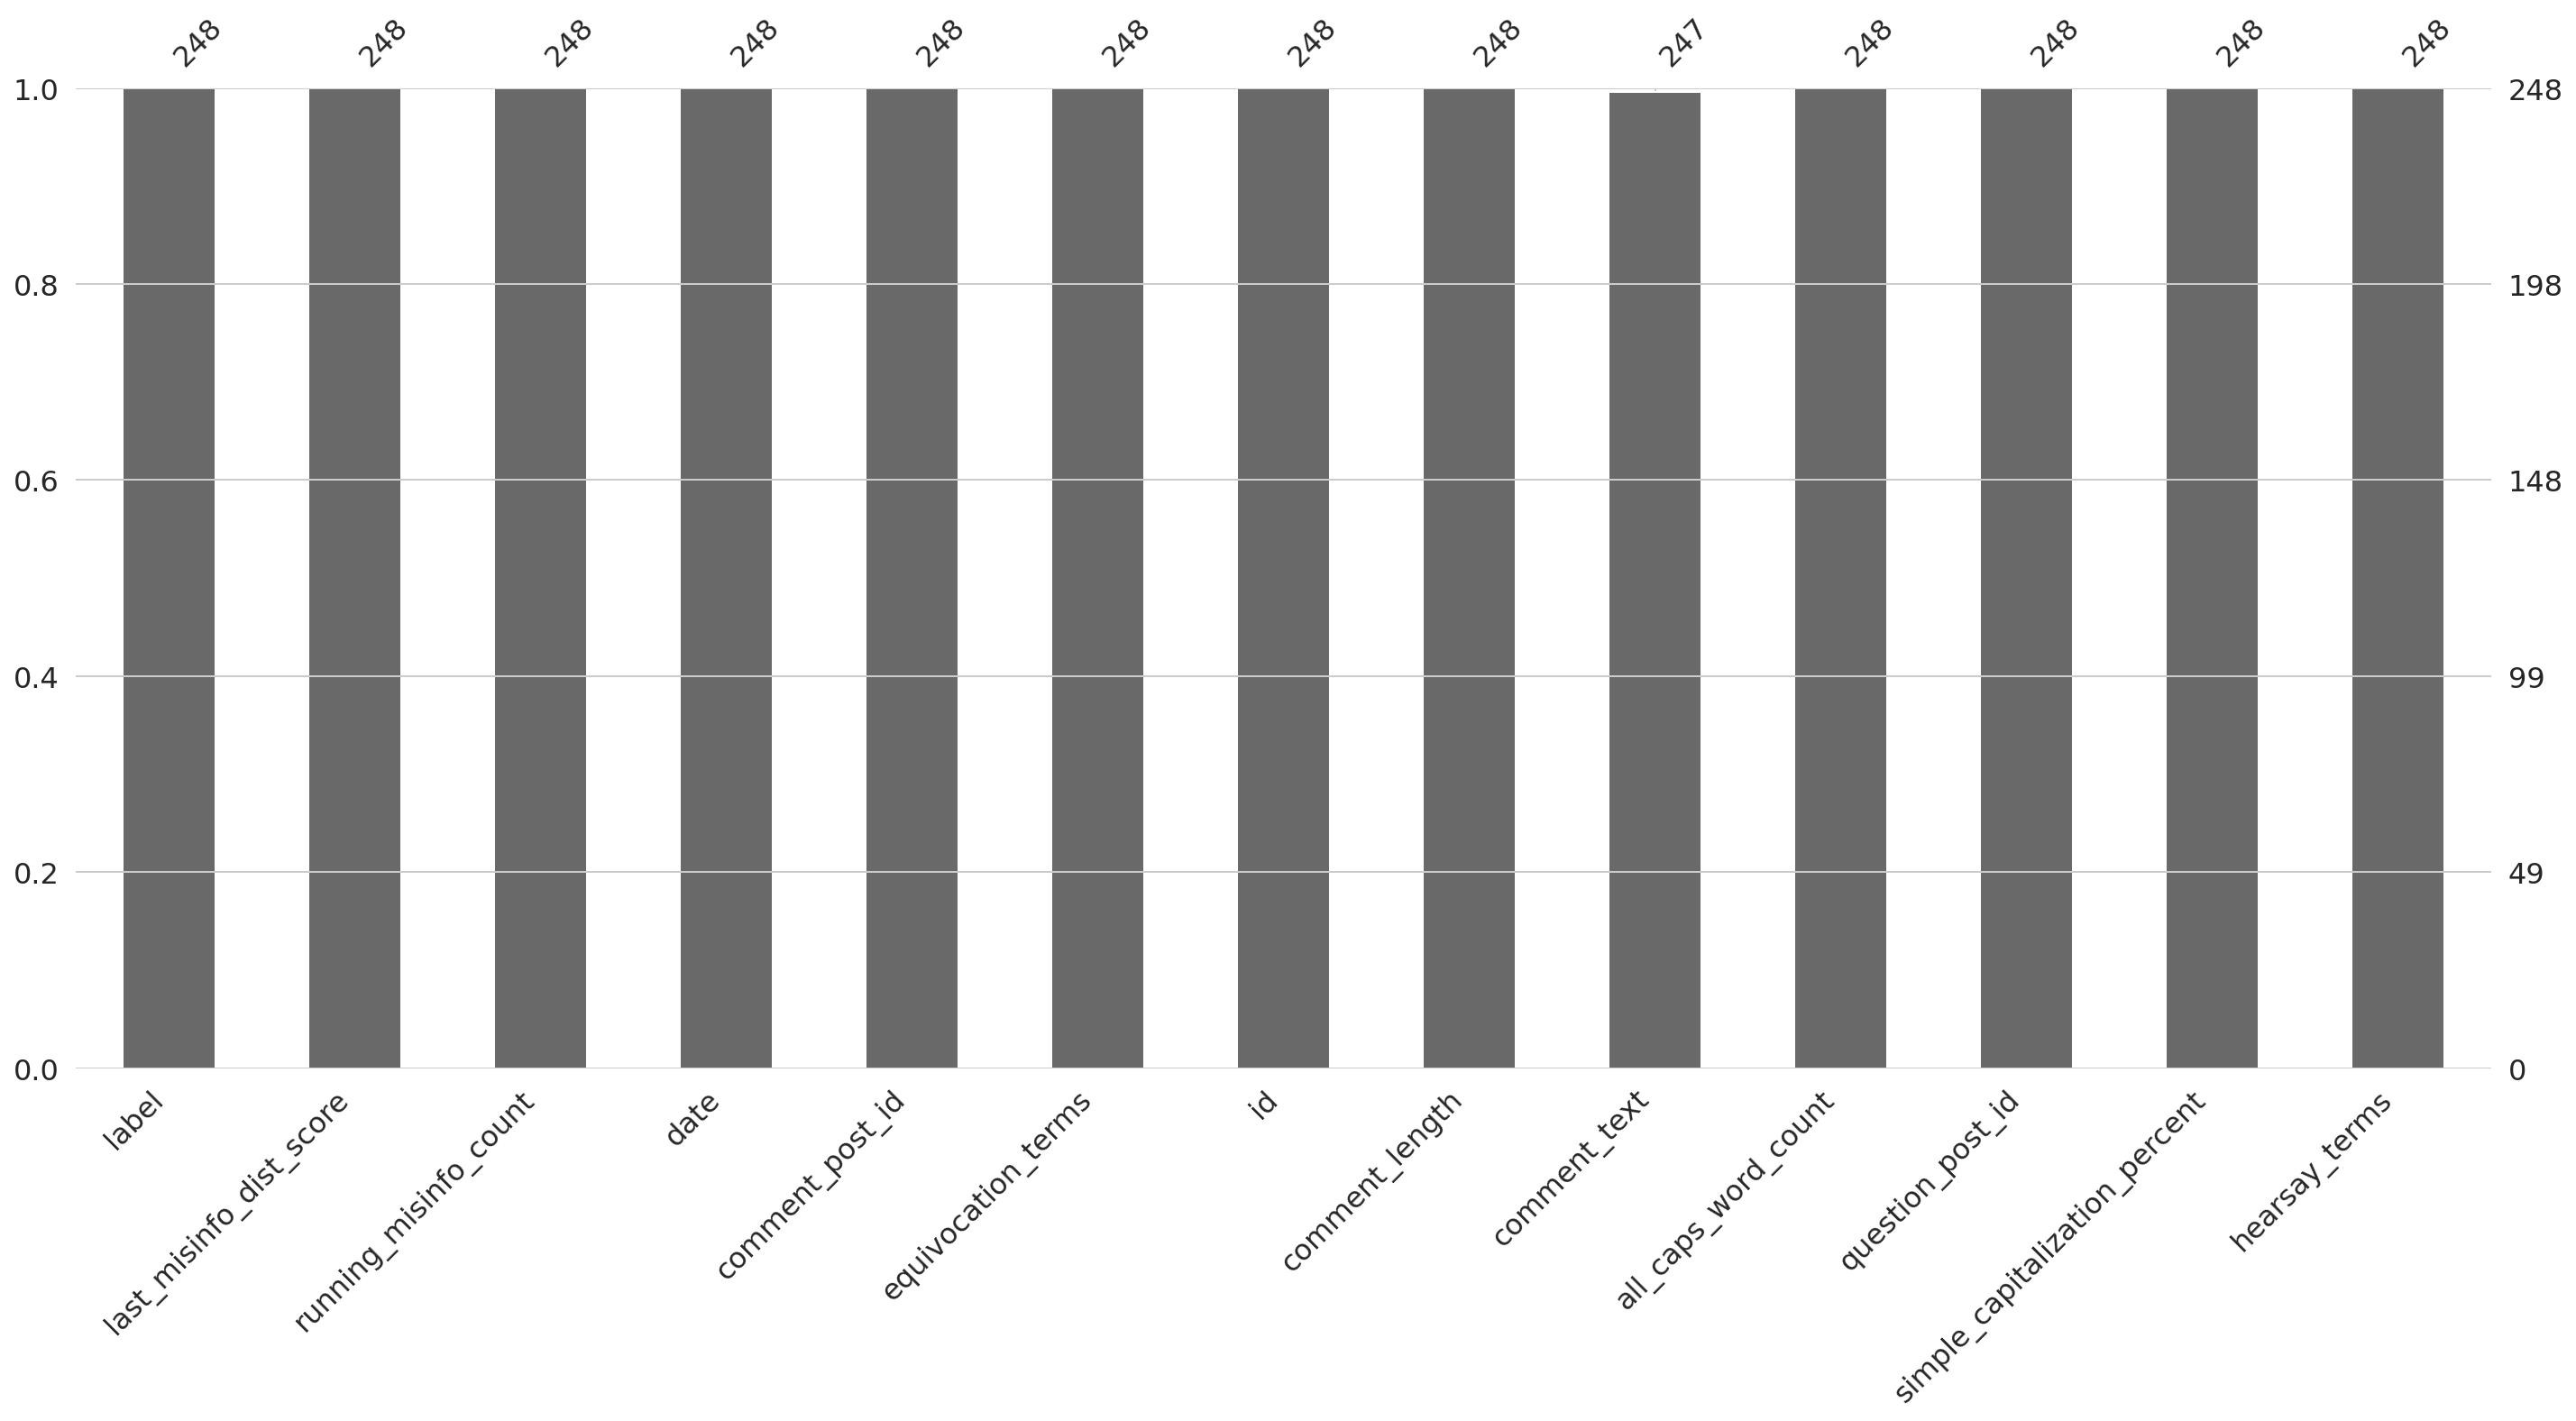

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'id', 'date', 'comment_post_id', 'question_post_id'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'comment_text'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'label' # attribute considered as "label"

### Label attribute distribution

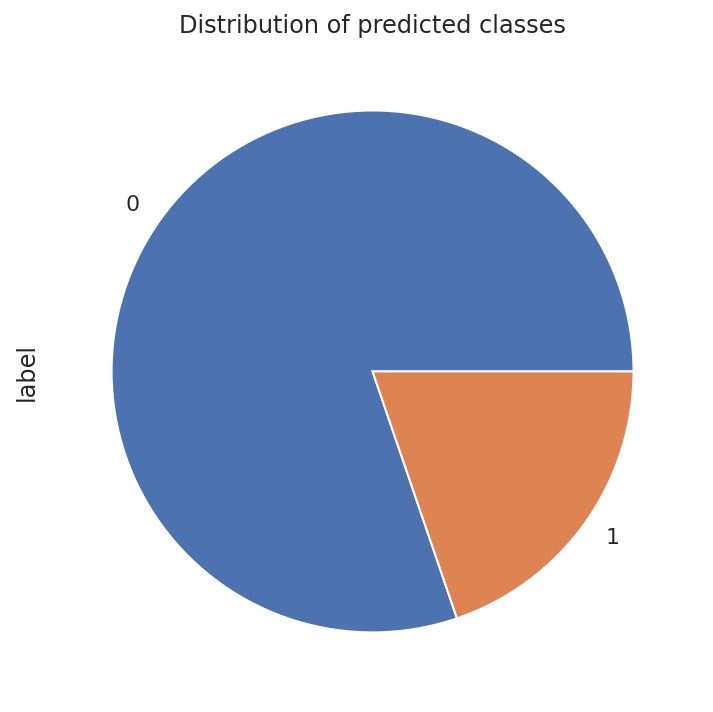

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

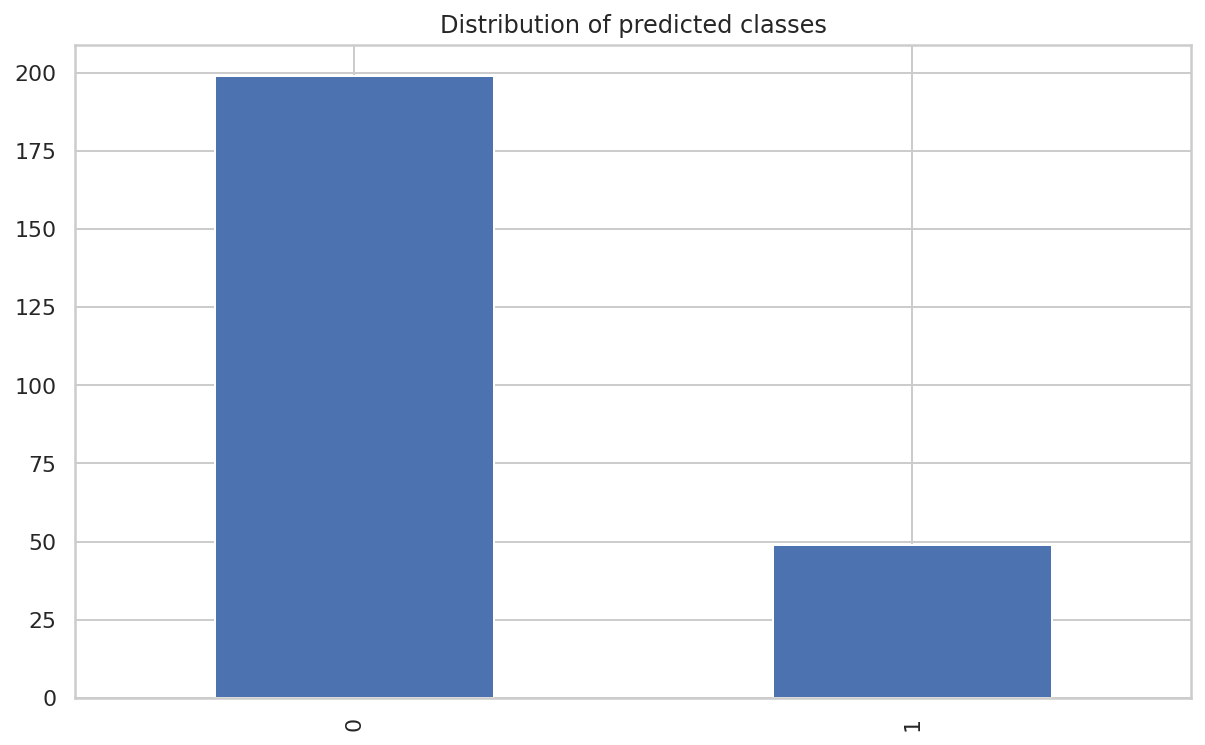

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "last_misinfo_dist_score"


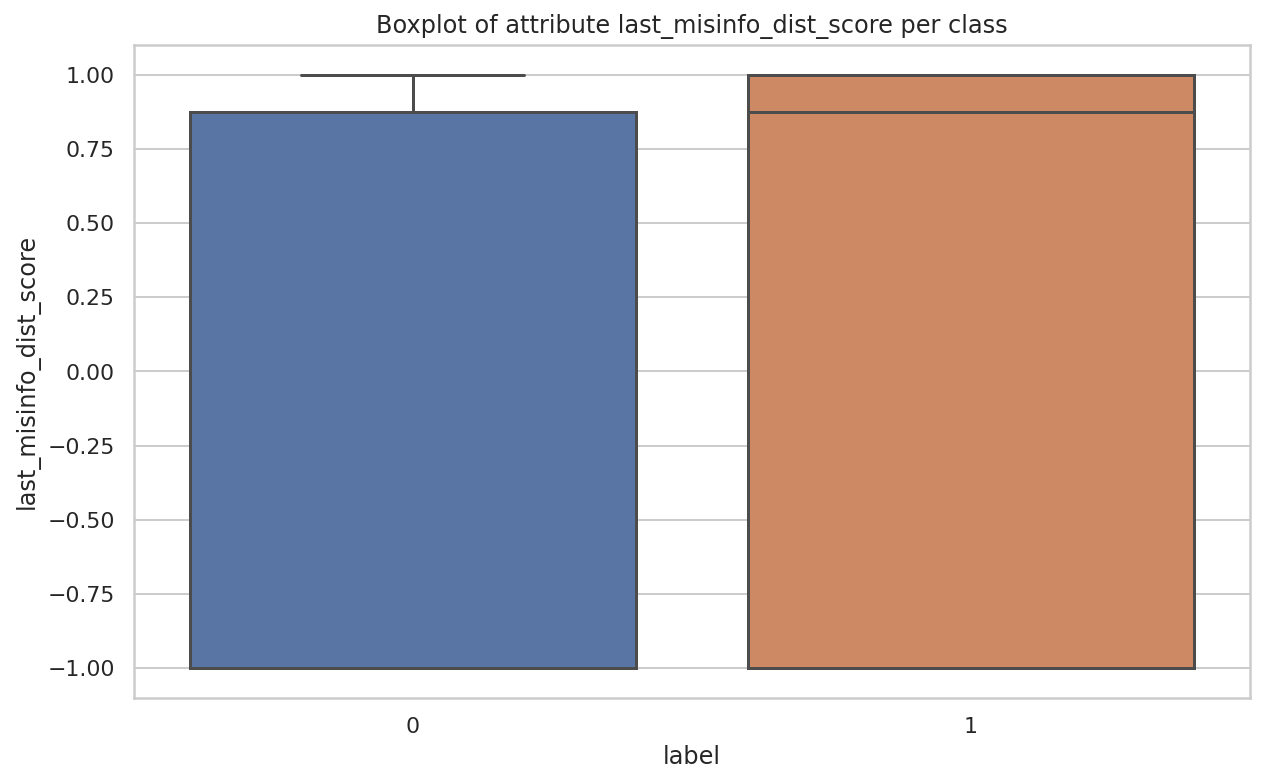

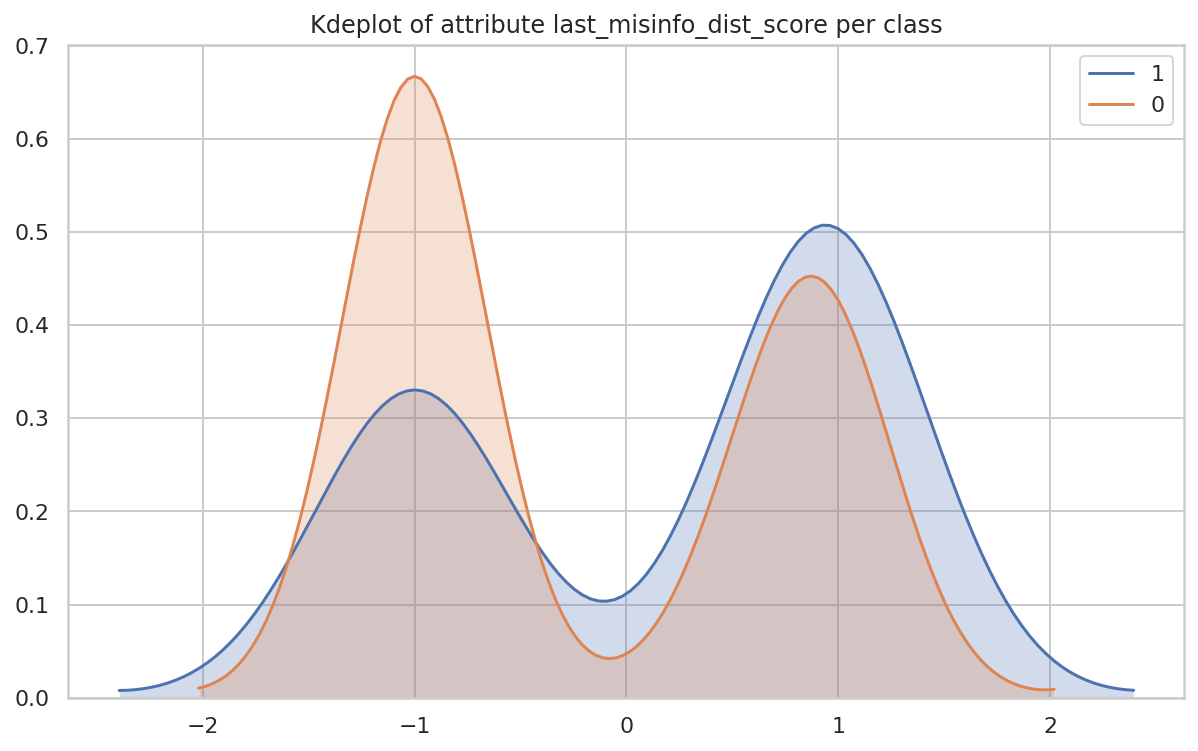



Analysis of attribute "running_misinfo_count"


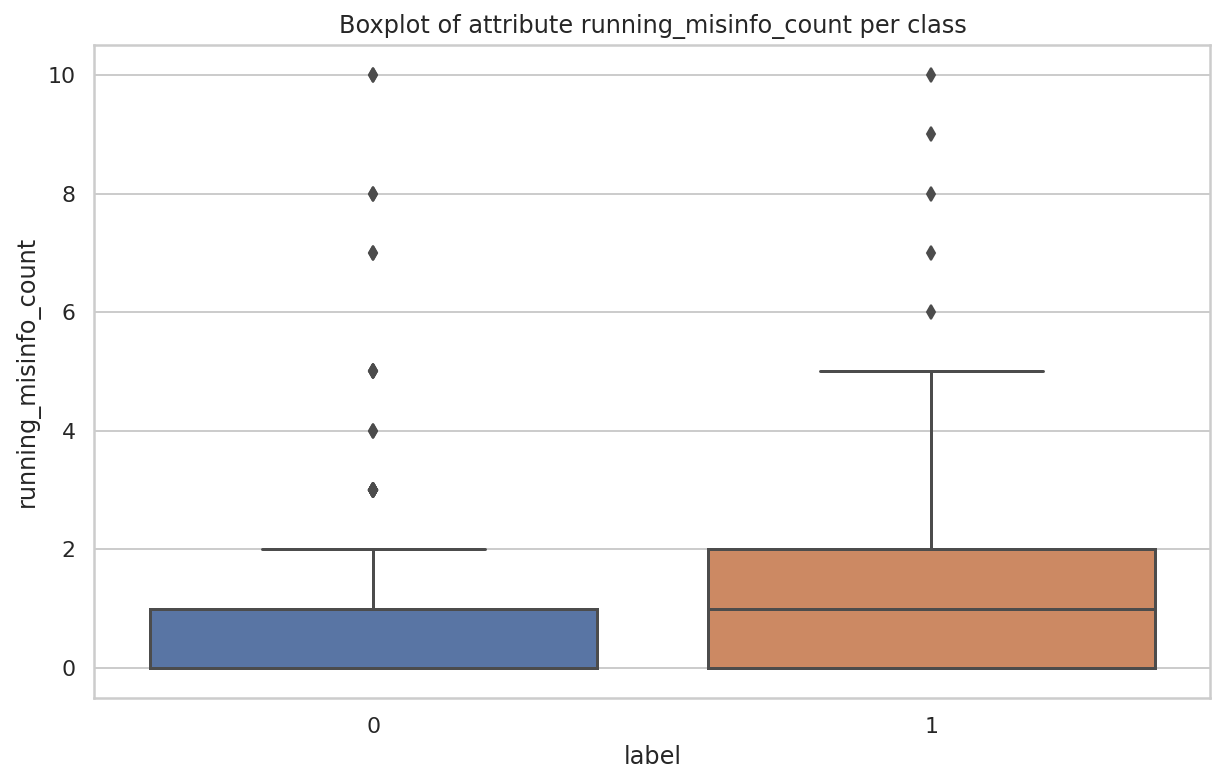

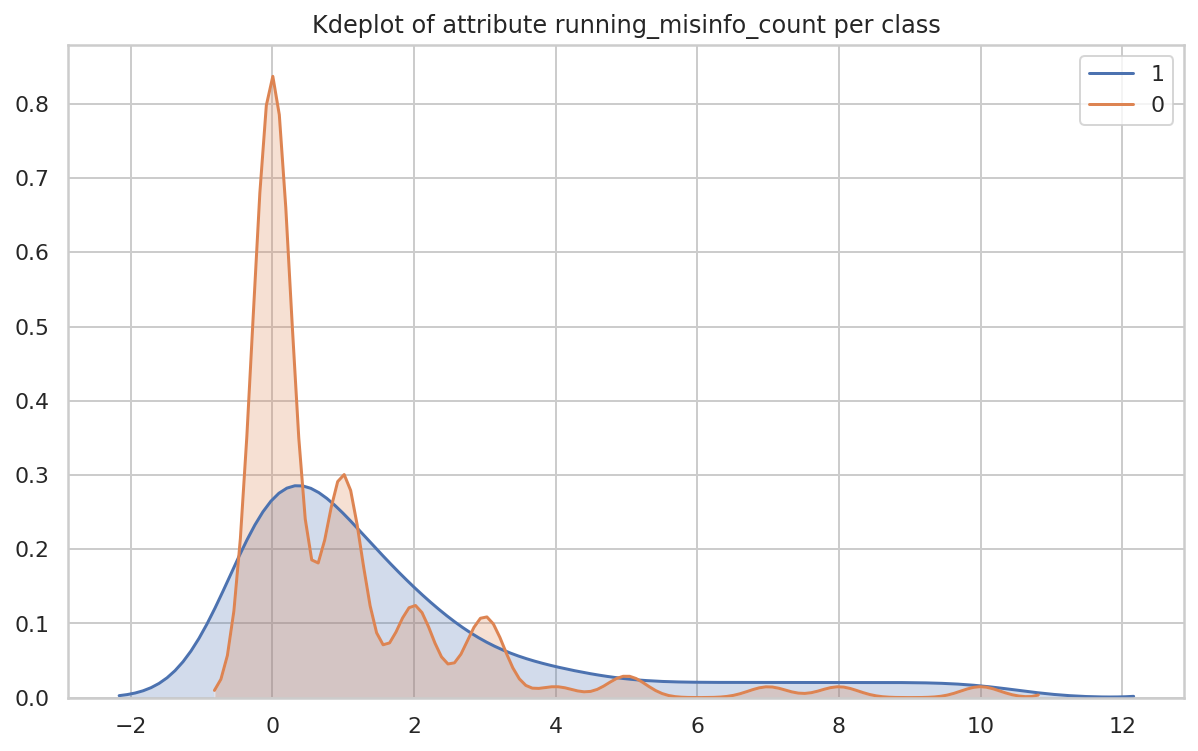



Analysis of attribute "equivocation_terms"


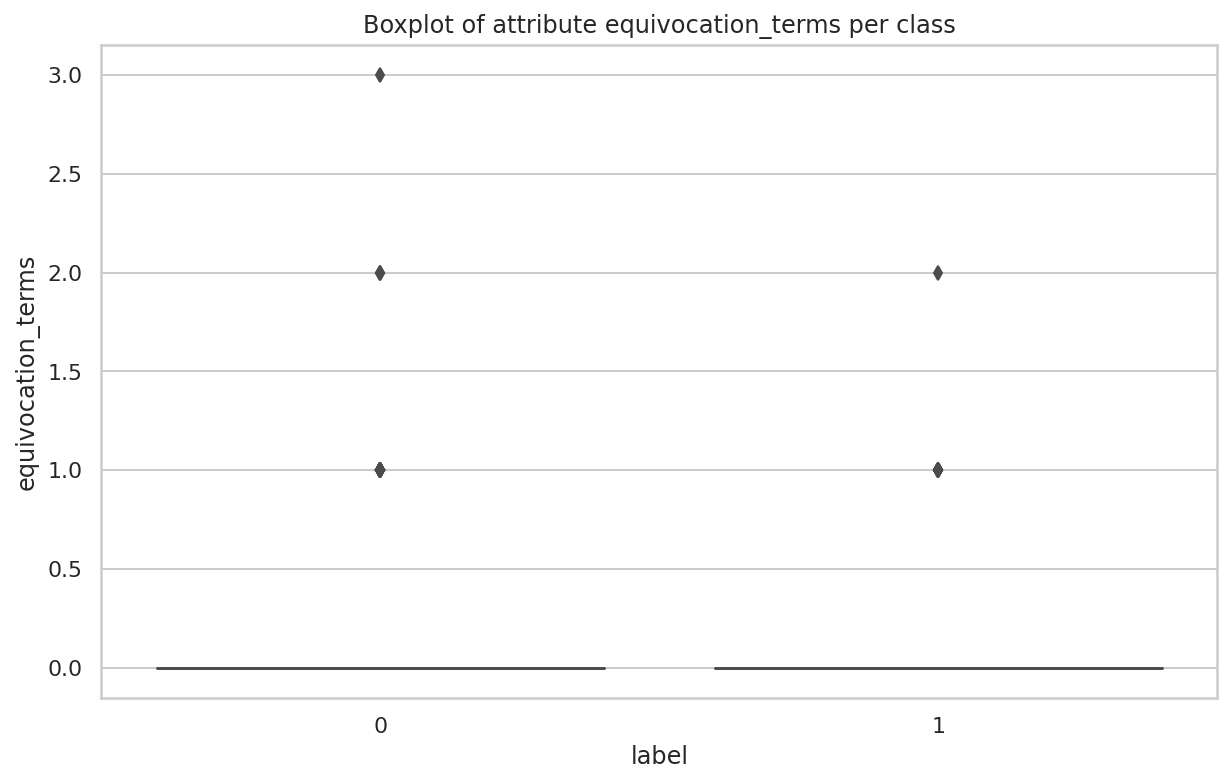



Analysis of attribute "comment_length"


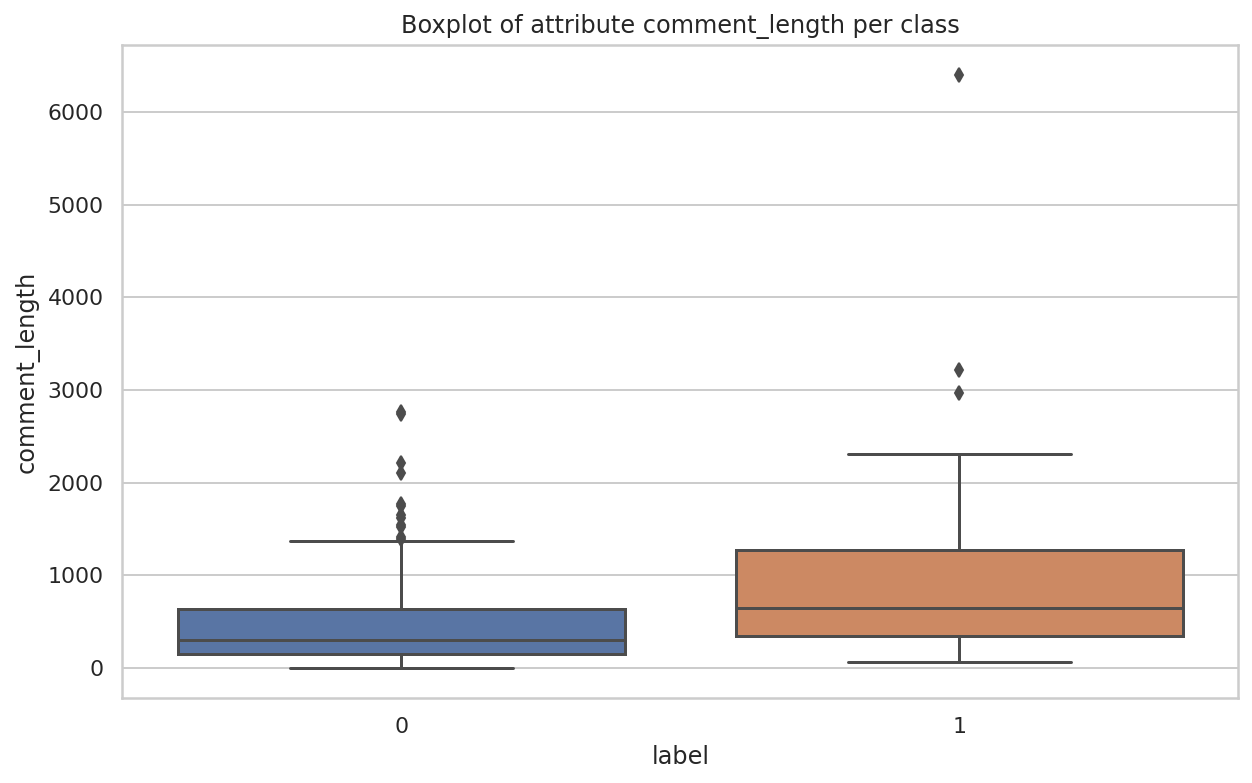

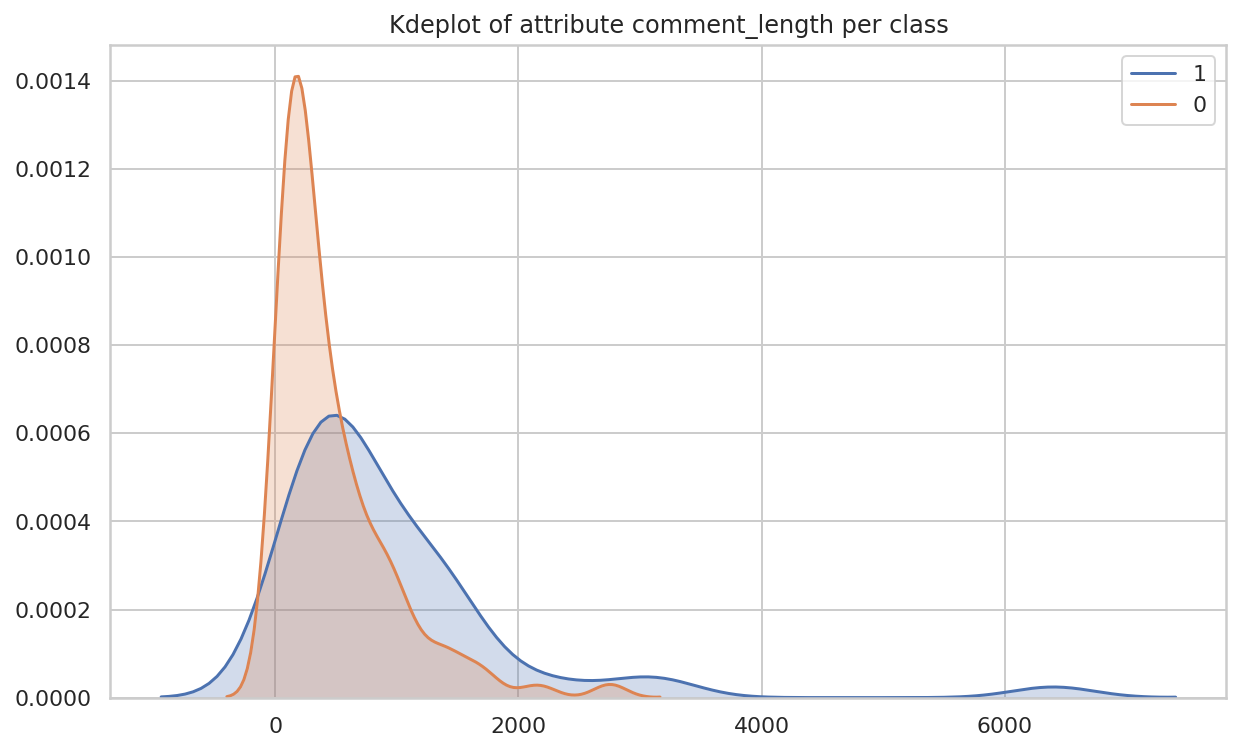



Analysis of attribute "all_caps_word_count"


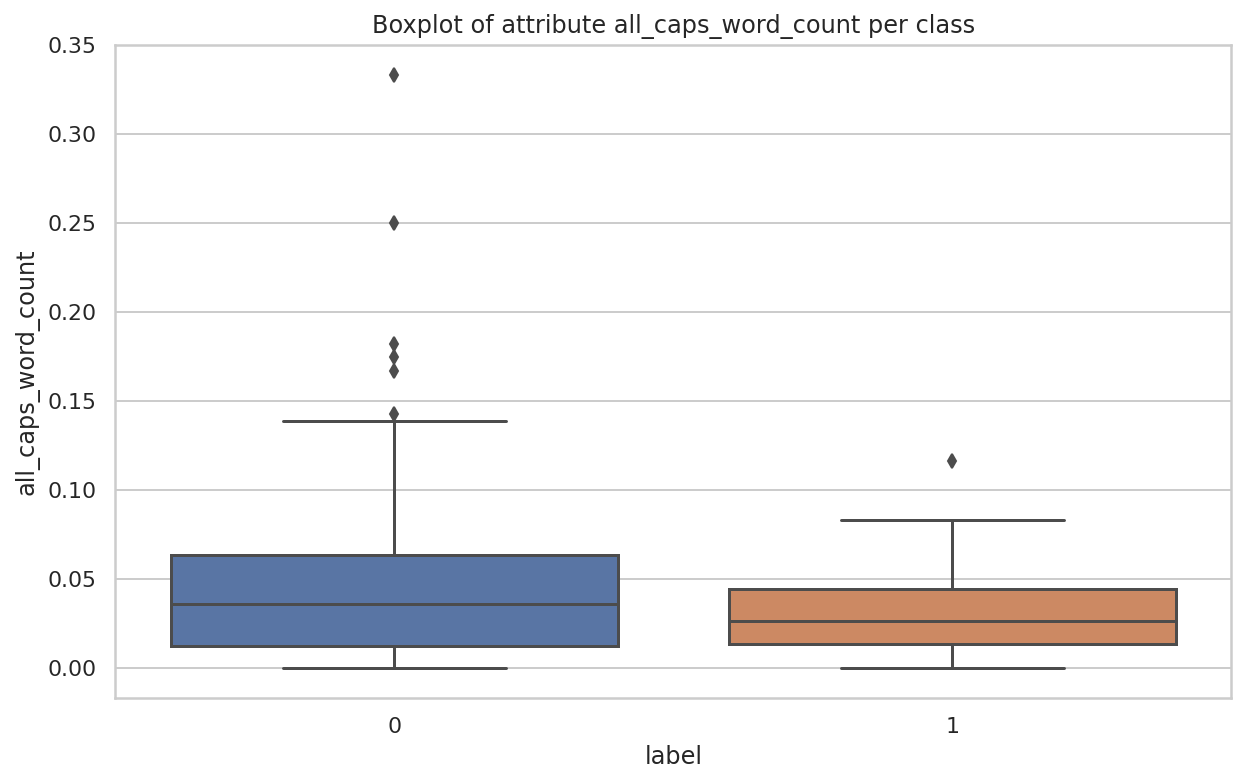

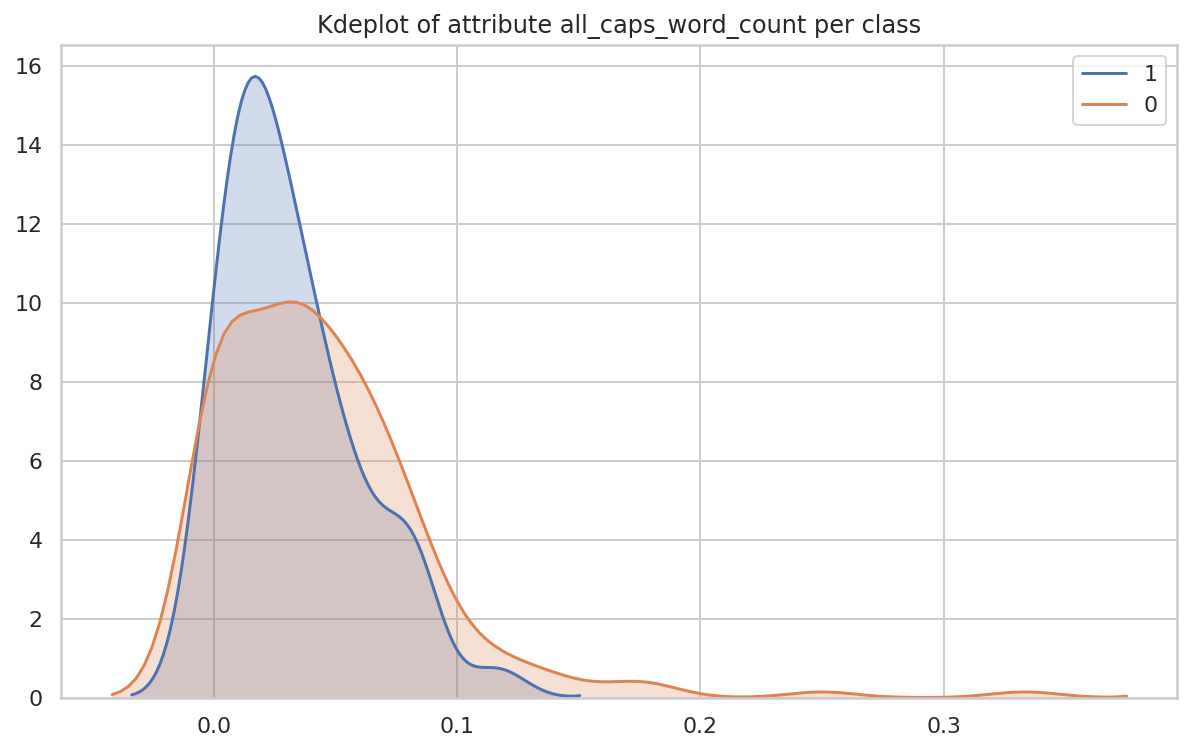



Analysis of attribute "simple_capitalization_percent"


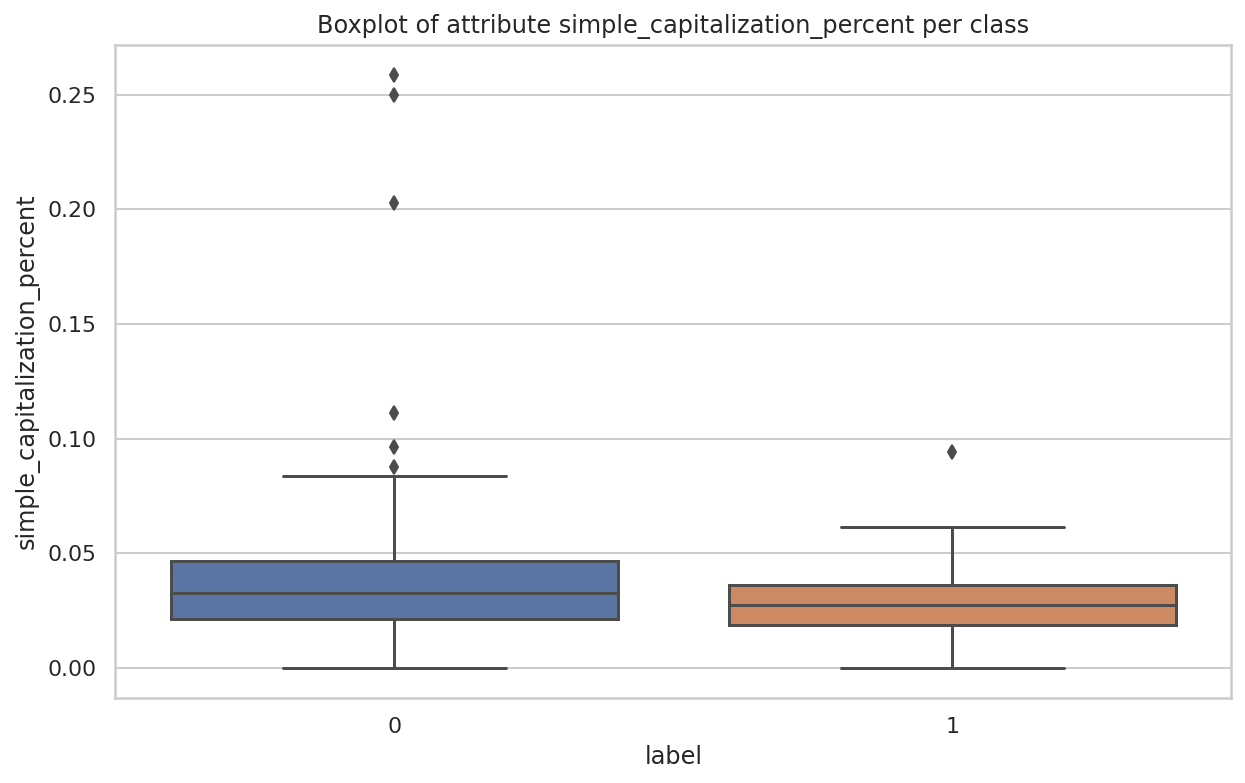

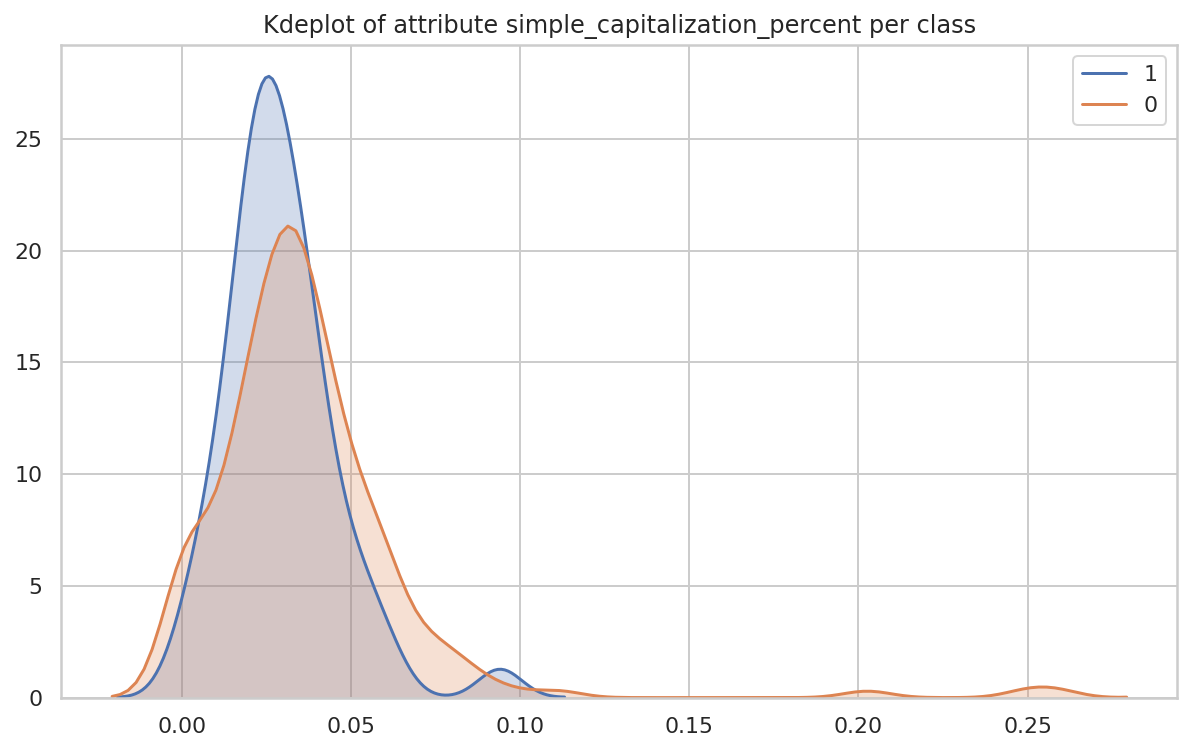



Analysis of attribute "hearsay_terms"


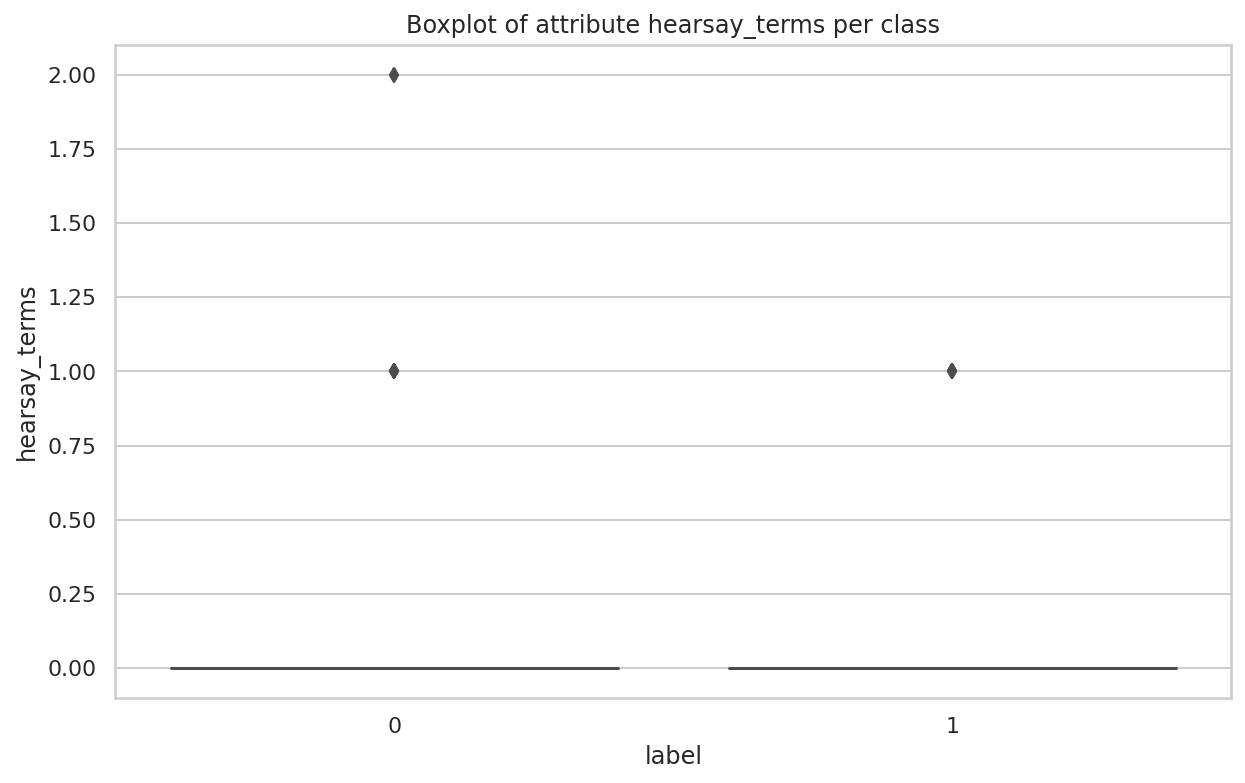

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "comment_text"


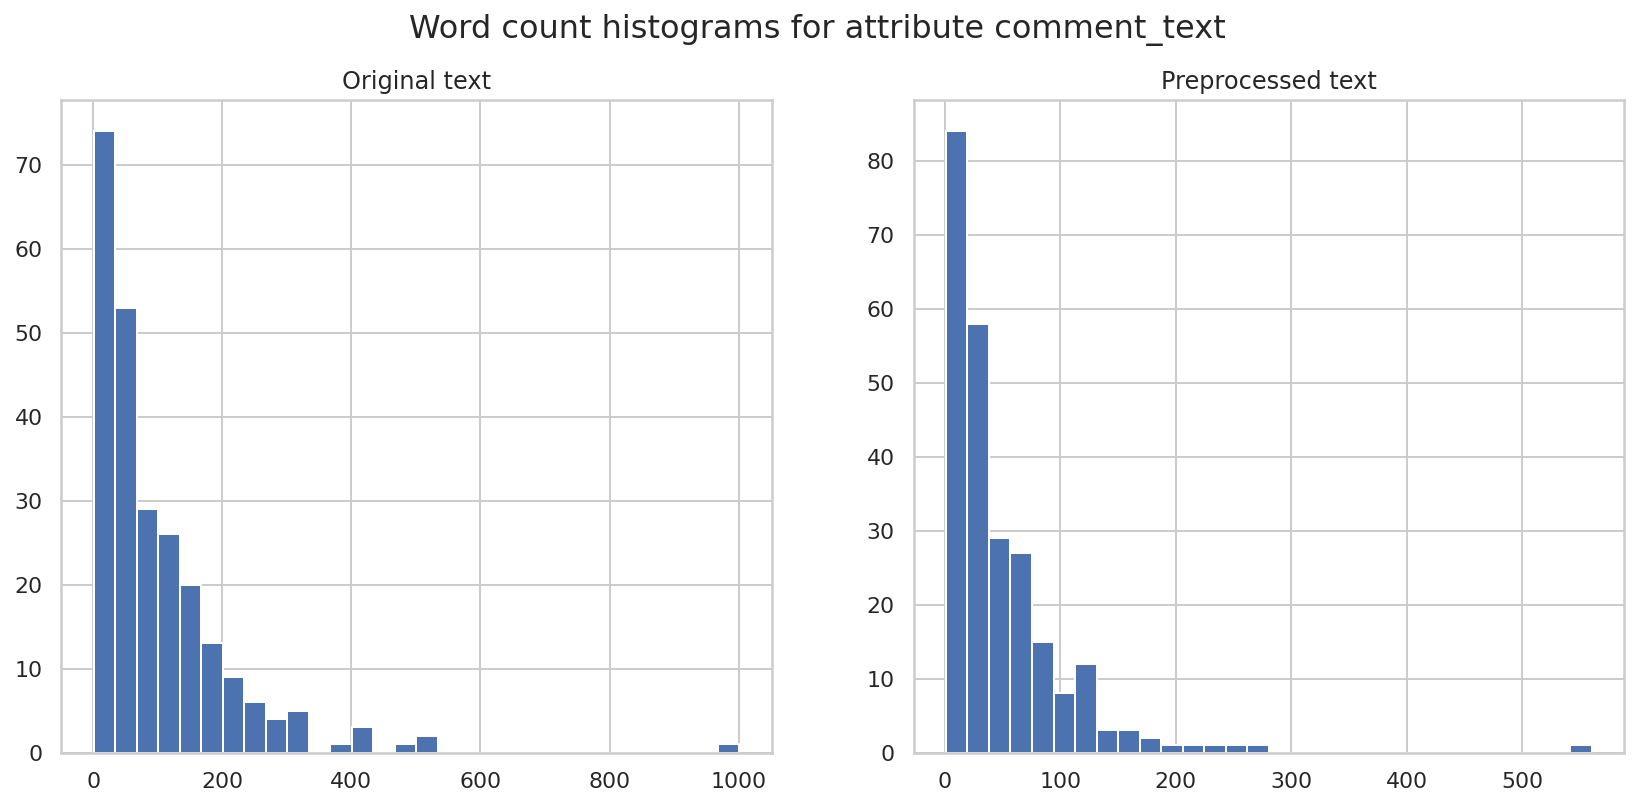

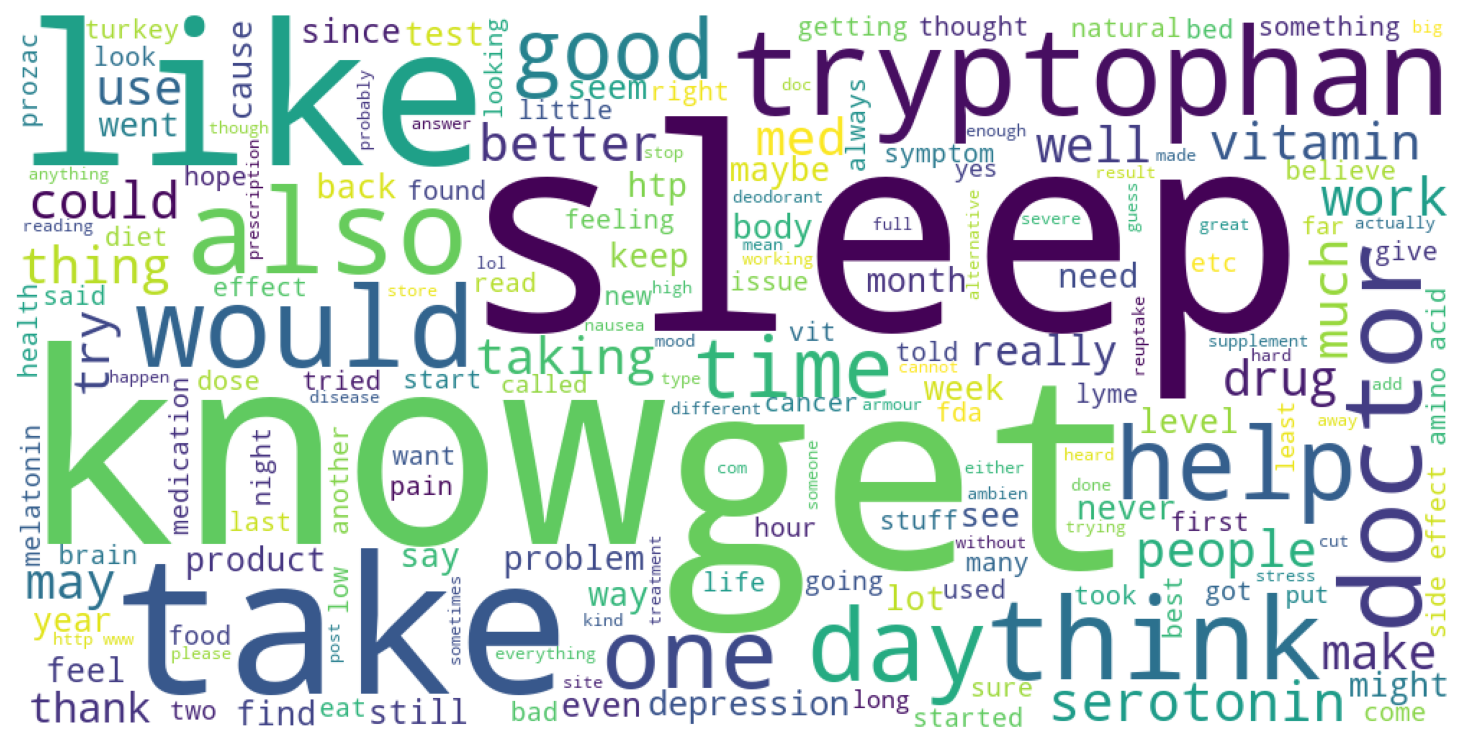

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

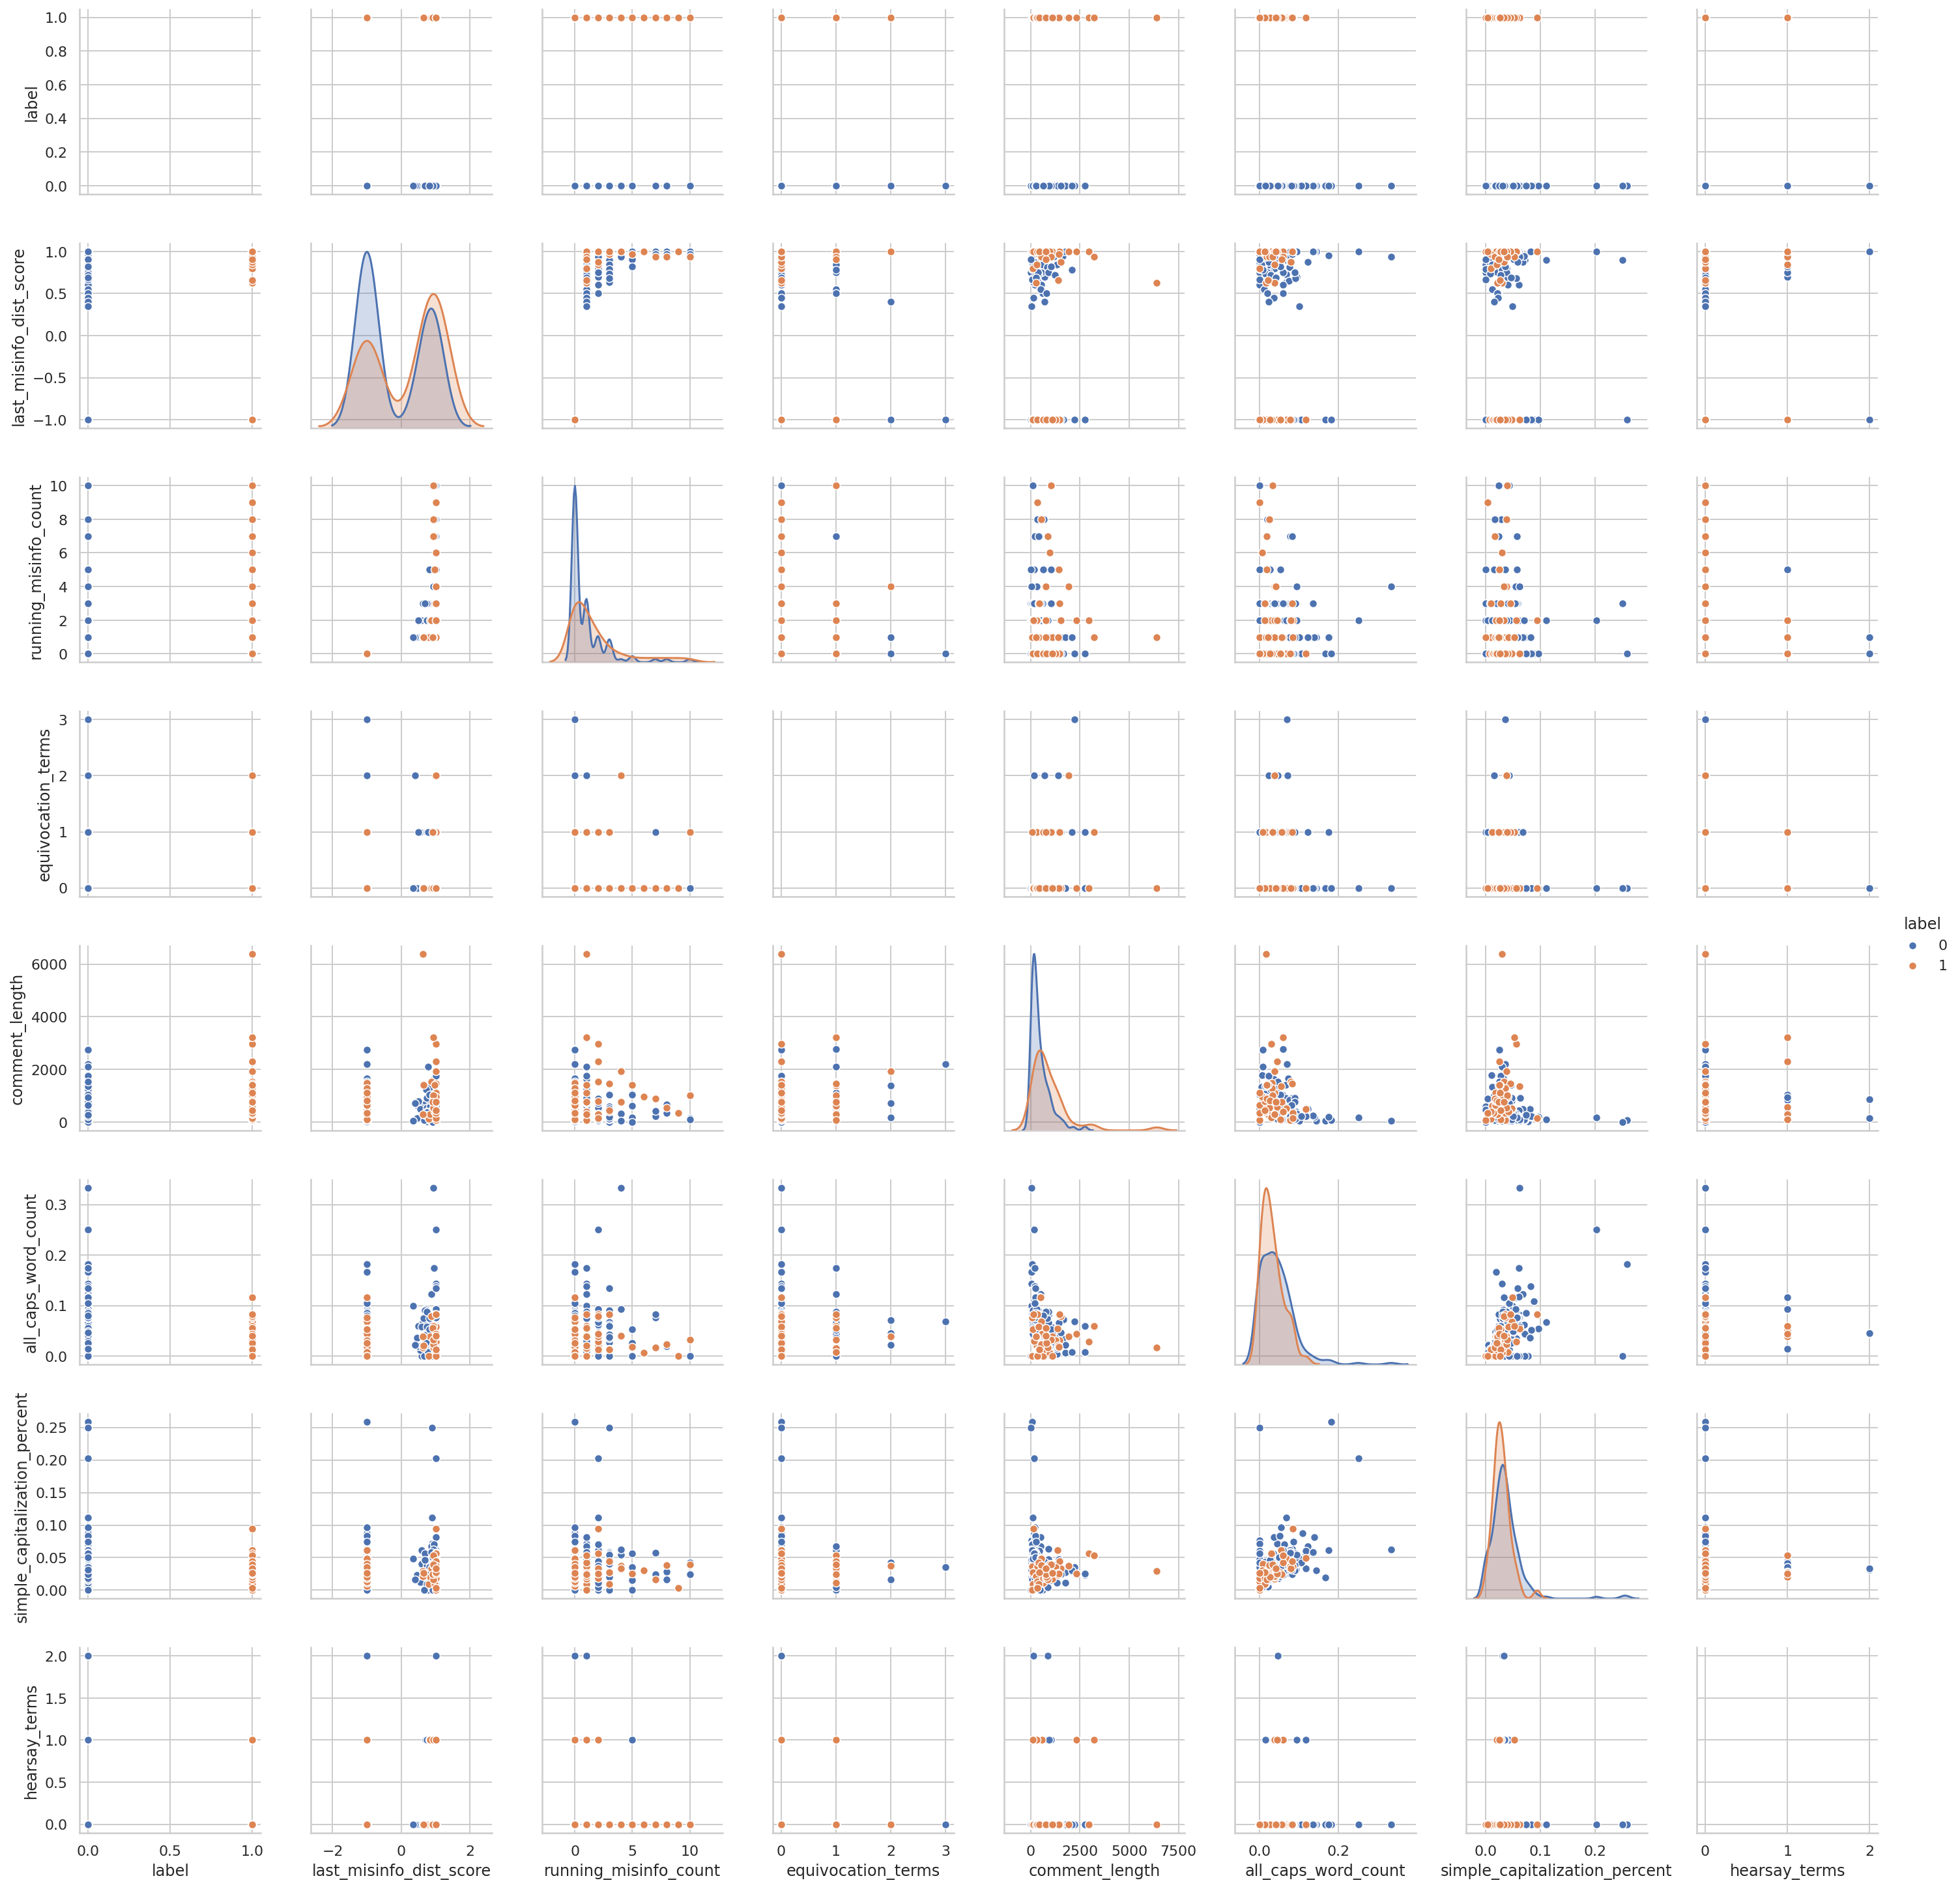

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

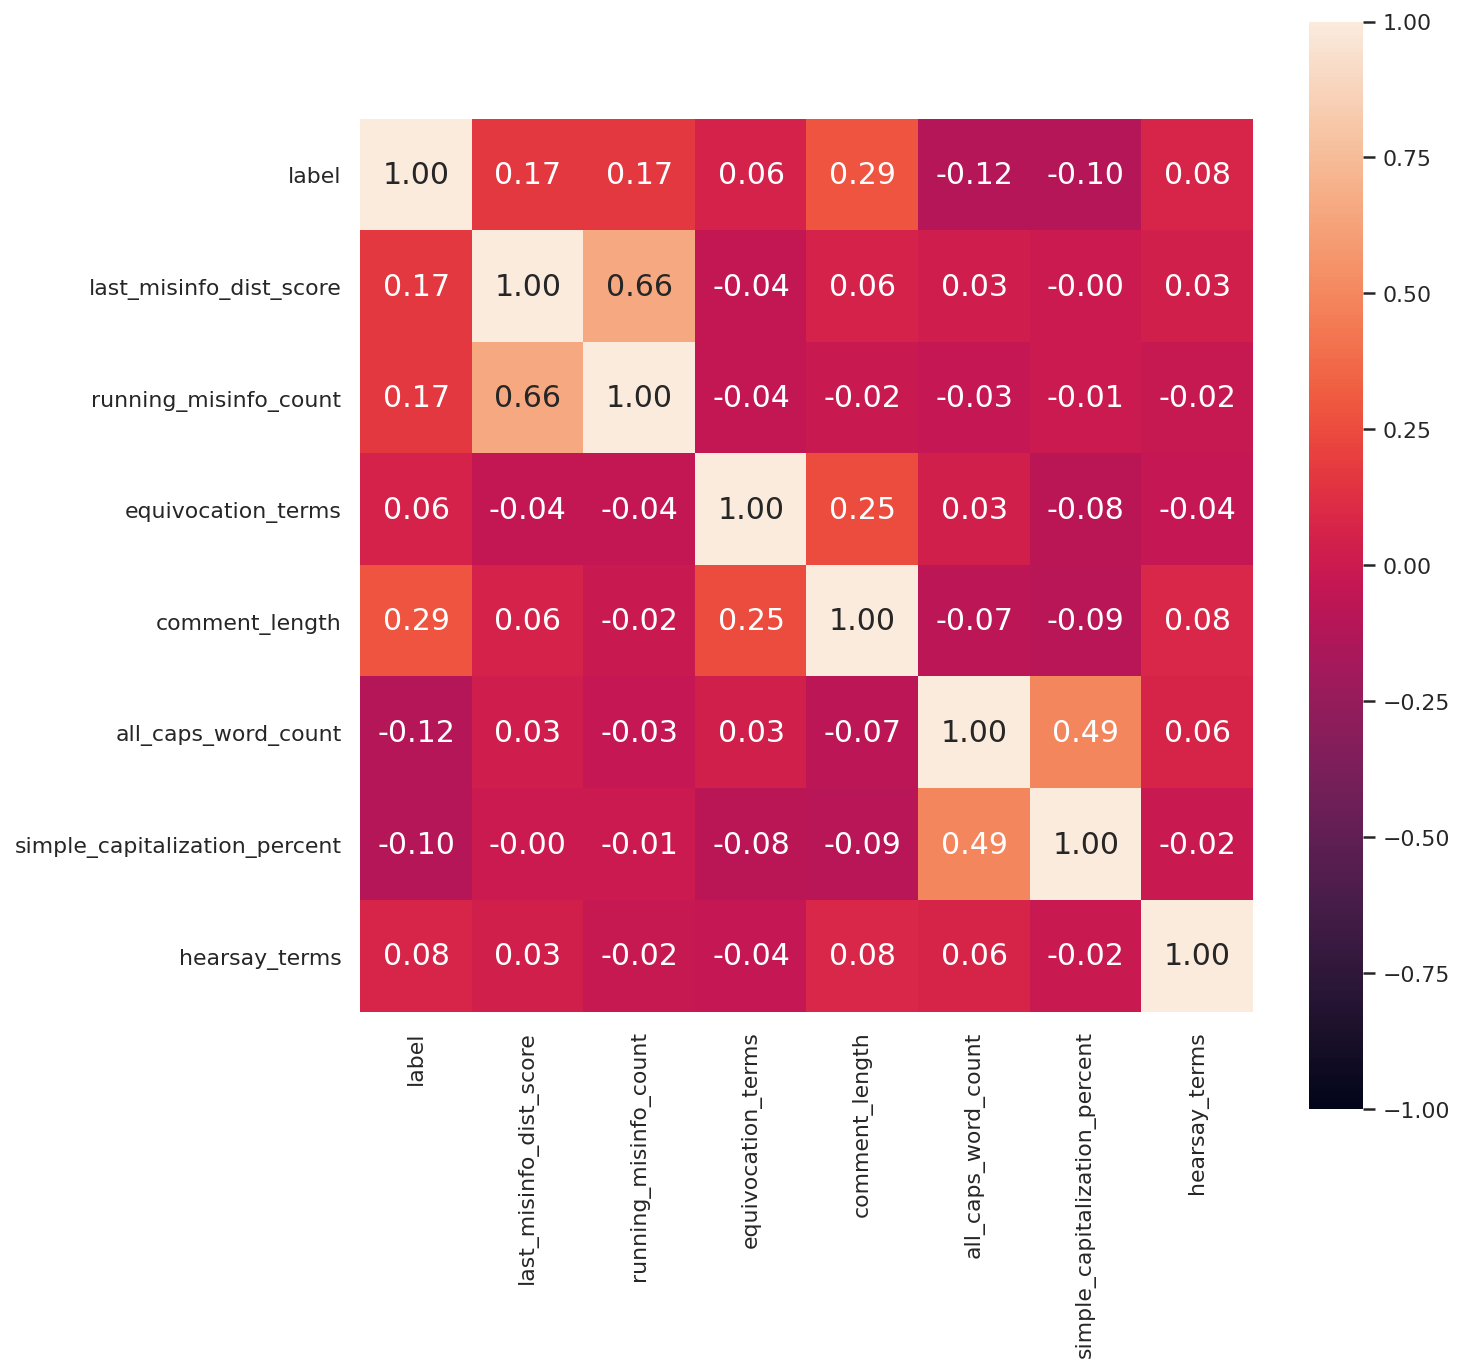

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)